   Unnamed: 0  Green    Red   Blue  Yellow  Orange  Pink  Violet  Cyan  \
0         NaN  24500  49000  23500   24500   24300  2100    3100  4100   
1         NaN   8000      0   1212       0    2154  1300    2300  3300   
2         NaN  24400  48800  23400   24400   24200  1900    2900  3900   
3         NaN    320   4520   1212    2552    7865  1600    2600  3600   
4         NaN  24000  47800  23000   24000   23800  2000    3000  4000   

   Combination BACKGROUND  
0        49281      Light  
1        15342       Dark  
2        49182      Light  
3        13245      Light  
4        48580      Light  

Missing values in the dataset:
Unnamed: 0     1021
Green             0
Red               0
Blue              0
Yellow            0
Orange            0
Pink              0
Violet            0
Cyan              0
Combination       0
BACKGROUND        0
dtype: int64


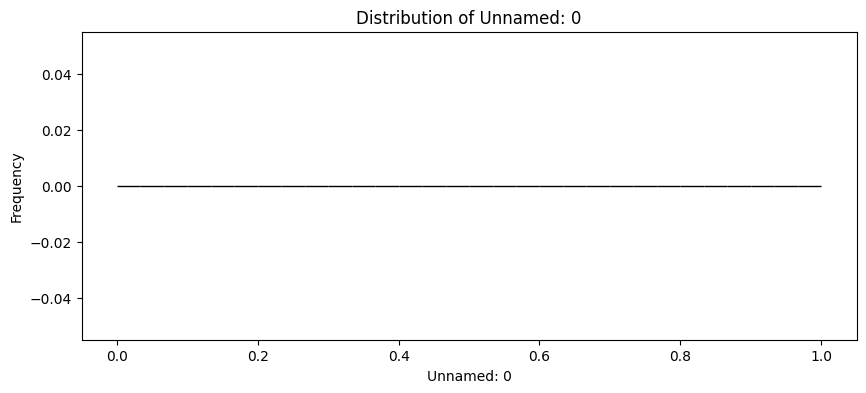

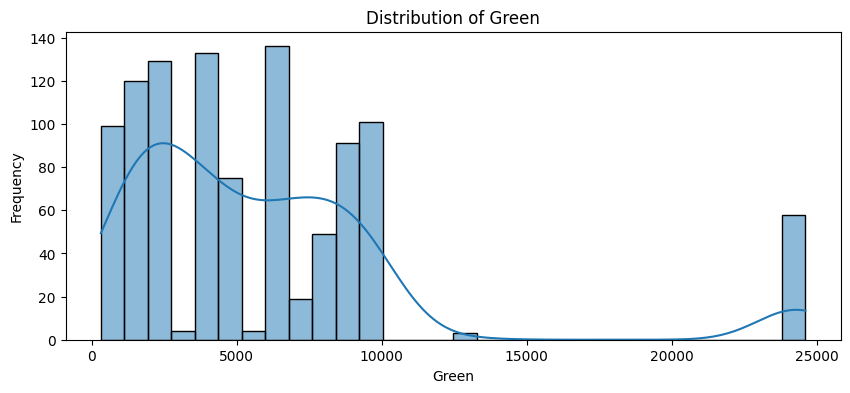

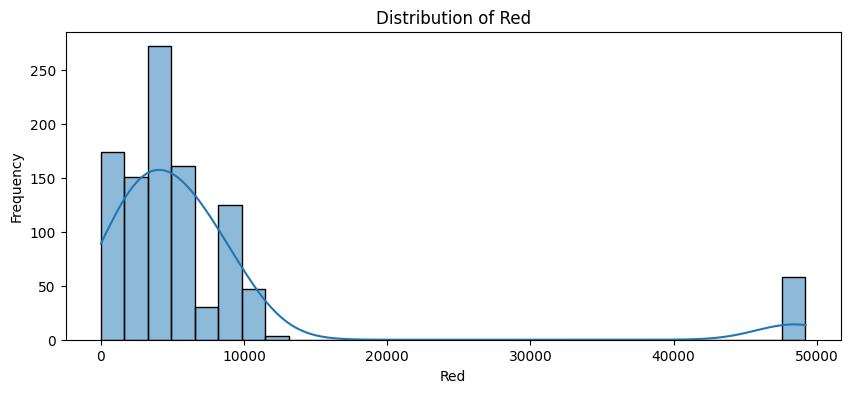

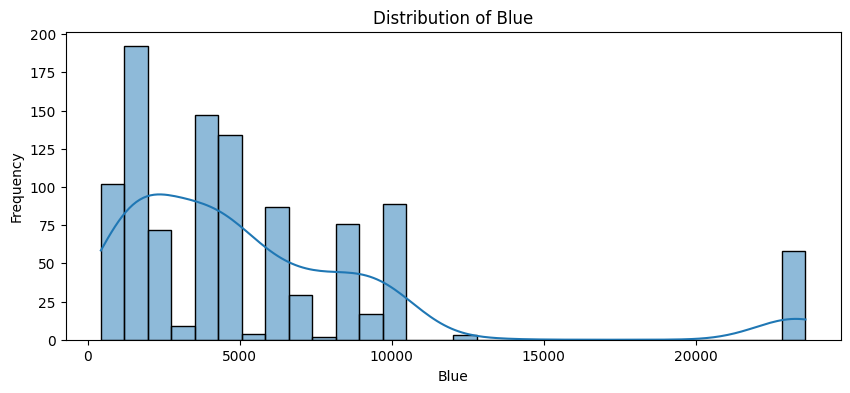

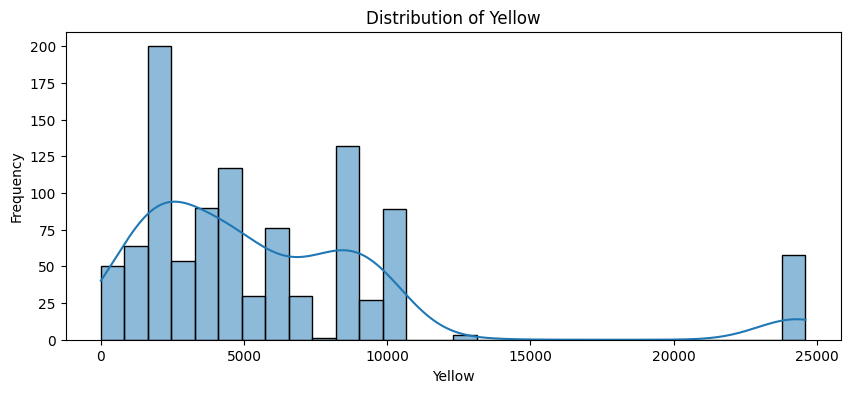

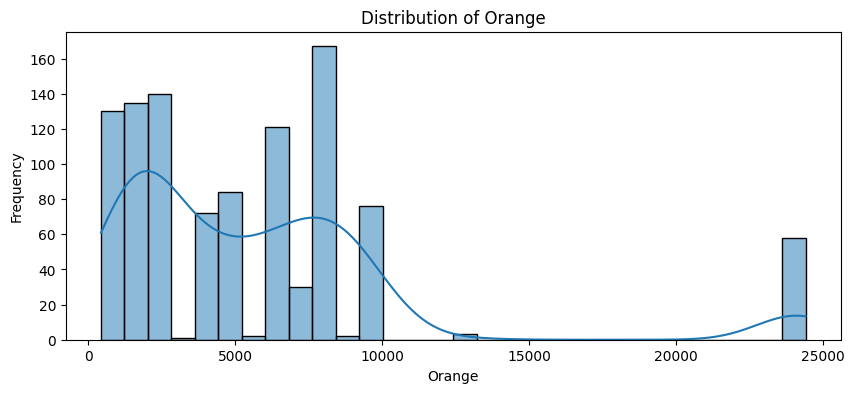

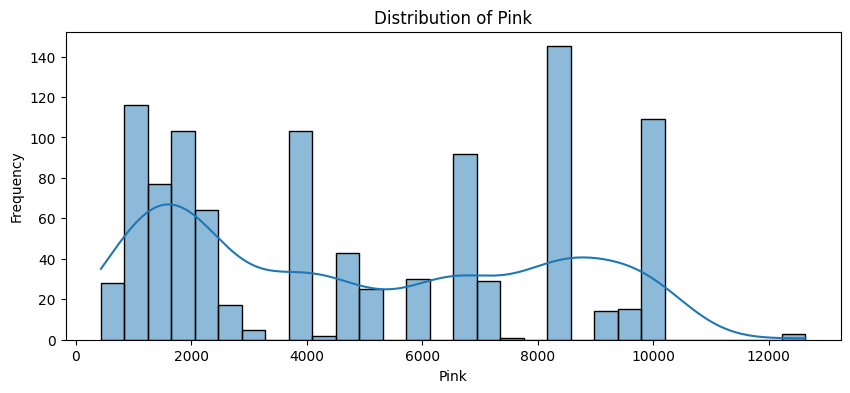

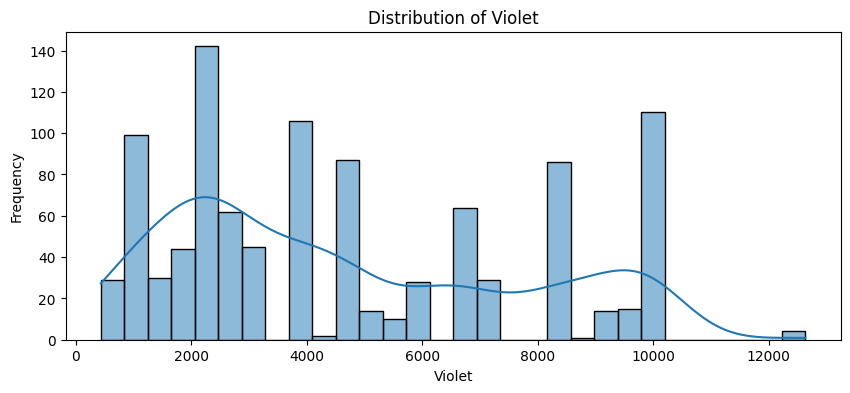

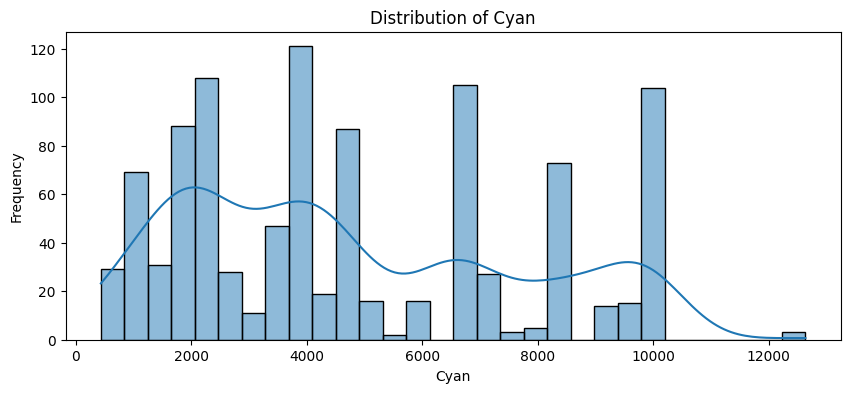

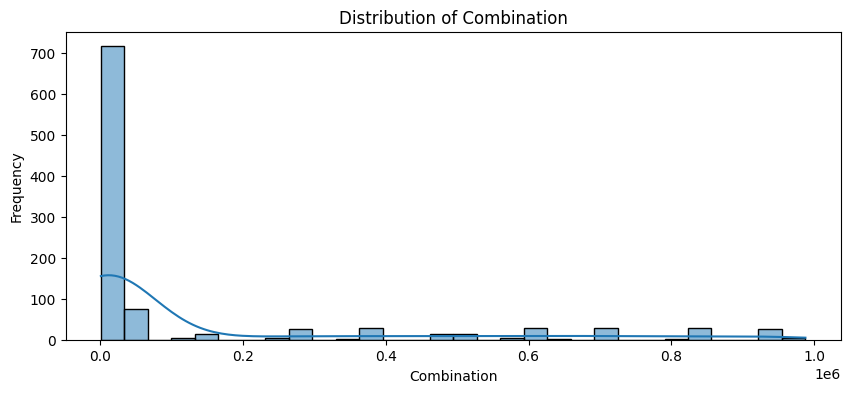

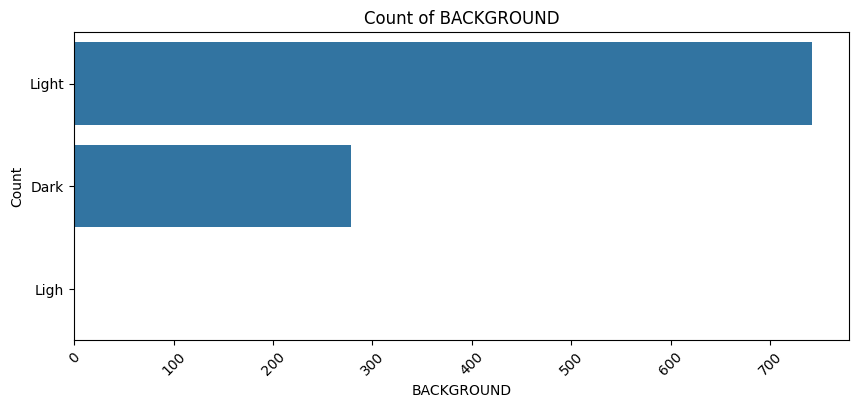

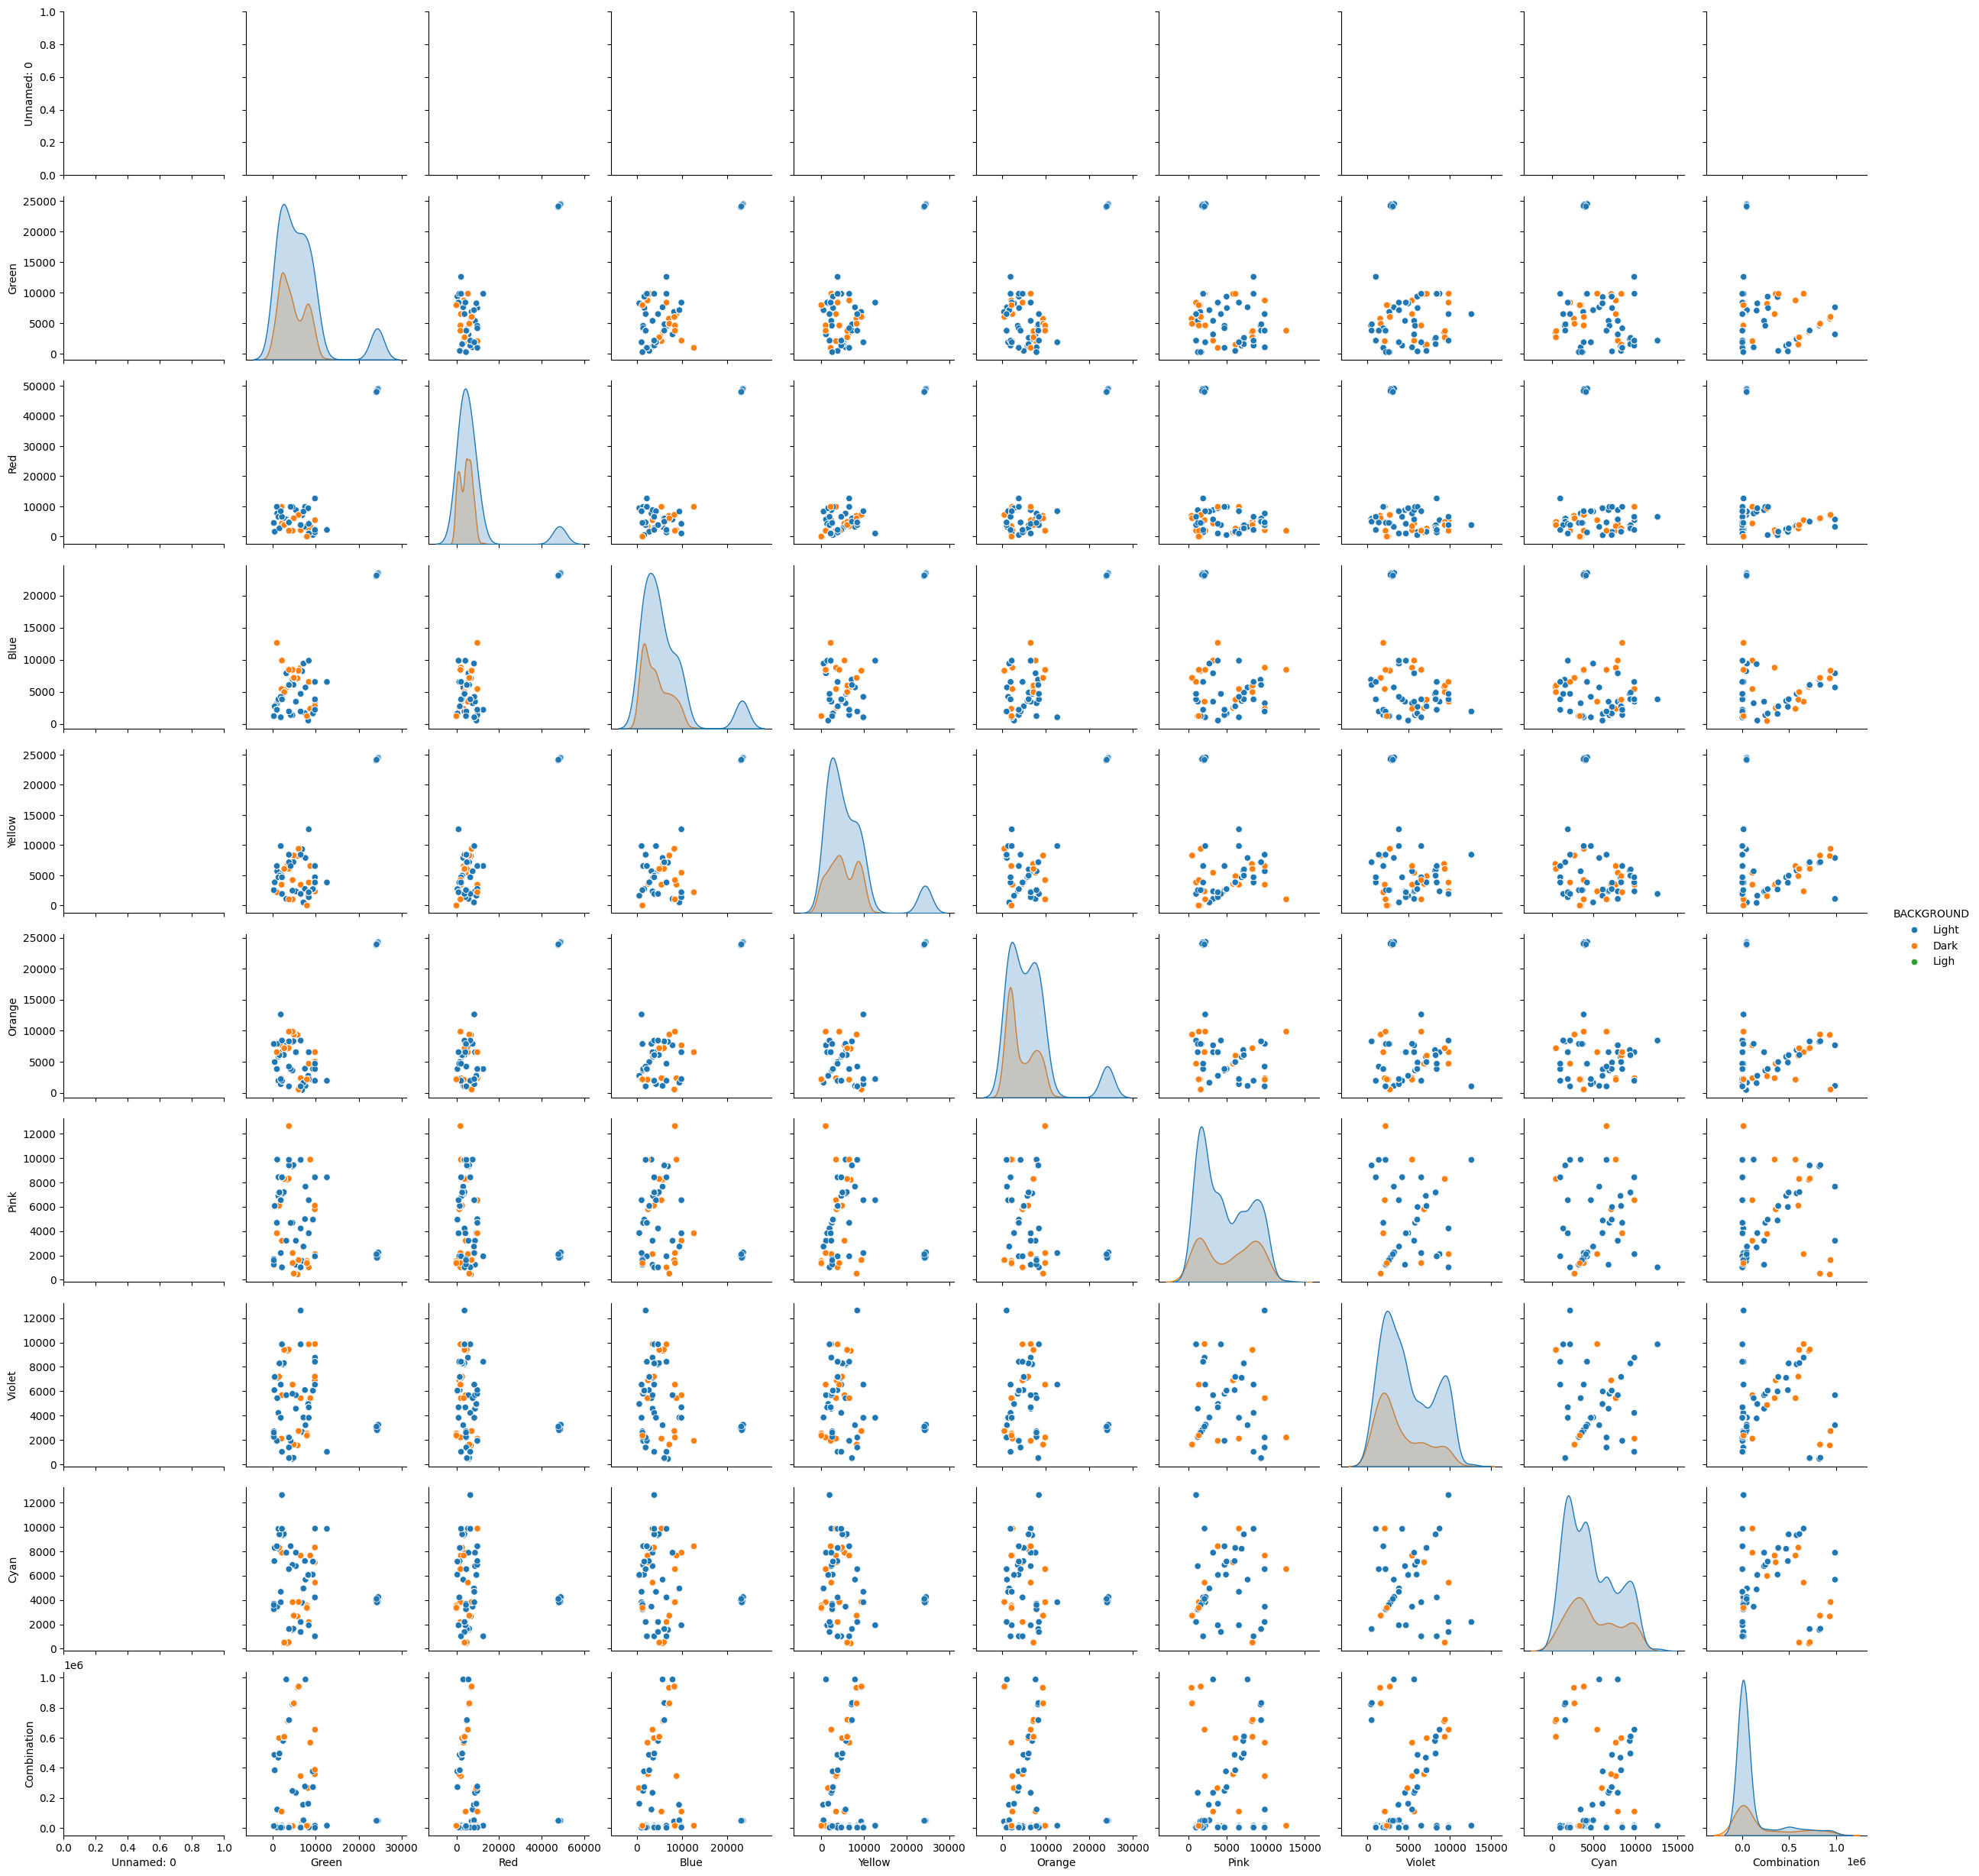

ValueError: could not convert string to float: 'Light'

In [ ]:
# Step 01 Import and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import (RandomForestClassifier,
GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')


# Step 02 Load Data
# Load data from CSV file
data = pd.read_excel('/content/COLOR COMBINATION DATASET_FEATURE SELECTION OUTCOMES.xlsx') # Replace 'your_data.csv' with your actual file path
# Display first few rows of the dataframe
print(data.head())

#
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())
# Optionally, you can fill or drop missing values
# data.fillna(method='ffill', inplace=True) # Forward fill
# data.dropna(inplace=True) # Drop rows with missing values


# Plot distributions for numerical features
num_features = data.select_dtypes(include=[np.number]).columns
for feature in num_features:
 plt.figure(figsize=(10, 4))
 sns.histplot(data[feature], kde=True, bins=30)
 plt.title(f'Distribution of {feature}')
 plt.xlabel(feature)
 plt.ylabel('Frequency')
 plt.show()

# Plot count of categorical features [target column]
cat_features = data.select_dtypes(include=[object]).columns
for feature in cat_features:
 plt.figure(figsize=(10, 4))
 sns.countplot(data[feature])
 plt.title(f'Count of {feature}')
 plt.xlabel(feature)
 plt.ylabel('Count')
 plt.xticks(rotation=45)
 plt.show()


# Scatter plot for numerical features
sns.pairplot(data, hue='BACKGROUND') # Replace 'target' with your target column name
plt.show()
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



# Box plots to check the distribution of numerical features by categorical features
for feature in num_features:
 plt.figure(figsize=(10, 4))
 sns.boxplot(x='BACKGROUND', y=feature, data=data) # Replace 'target' with your target column name
 plt.title(f'{feature} by Target')
 plt.xlabel('BACKGROUND')
 plt.ylabel(feature)
 plt.show()
# Violin plots for better understanding of distribution
for feature in num_features:
 plt.figure(figsize=(10, 4))
 sns.violinplot(x='BACKGROUND', y=feature, data=data) # Replace'target' with your target column name
 plt.title(f'{feature} Distribution by Target')
 plt.xlabel('BACKGROUND')
 plt.ylabel(feature)
 plt.show()



# Scatter matrix for pairwise relationships
scatter_matrix(data[num_features], figsize=(12, 12), diagonal='kde')
plt.suptitle('Scatter Matrix')
plt.show()



# Cross-tabulation and heatmap for categorical features
for feature in cat_features:
 if feature != 'BACKGROUND': # Skip if target is categorical
    crosstab = pd.crosstab(data[feature], data['BACKGROUND']) #Replace 'target' with your target column name
 plt.figure(figsize=(10, 6))
 sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d')
 plt.title(f'Cross-Tabulation of {feature} and BACKGROUND')
 plt.xlabel('BACKGROUND')
 plt.ylabel(feature)
 plt.show()



 # Assume the last column is the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42, stratify=y)
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


models = {
 'Logistic Regression': LogisticRegression(),
 'Random Forest': RandomForestClassifier(),
 'Gradient Boosting': GradientBoostingClassifier(),
 'Support Vector Machine': SVC(probability=True),
 'K-Nearest Neighbors': KNeighborsClassifier(),
 'Decision Tree': DecisionTreeClassifier(),
 'Naive Bayes': GaussianNB(),
 'AdaBoost': AdaBoostClassifier(),
 'Extra Trees': ExtraTreesClassifier(),
 'XGBoost': xgb.XGBClassifier(use_label_encoder=False,
eval_metric='logloss'),
 'LightGBM': lgb.LGBMClassifier(),
 'CatBoost': cb.CatBoostClassifier(silent=True)
}


# Define parameter grids for each model
param_grids = {
 'Logistic Regression': {
 'C': [0.1, 1, 10]
 },
 'Random Forest': {
 'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20, 30]
 },
 'Gradient Boosting': {
 'n_estimators': [50, 100],
 'learning_rate': [0.01, 0.1, 1]
 },
 'Support Vector Machine': {
 'C': [0.1, 1, 10],
 'kernel': ['linear', 'rbf']
 },
 'K-Nearest Neighbors': {
 'n_neighbors': [3, 5, 7],
 'weights': ['uniform', 'distance']
 },
 'Decision Tree': {
 'max_depth': [None, 10, 20, 30]
 },
 'Naive Bayes': {},
 'AdaBoost': {
 'n_estimators': [50, 100],
 'learning_rate': [0.01, 0.1, 1]
 },
 'Extra Trees': {
 'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20]
 },
 'XGBoost': {
 'n_estimators': [50, 100],
 'learning_rate': [0.01, 0.1, 0.2]
 },
 'LightGBM': {
 'n_estimators': [50, 100],
 'learning_rate': [0.01, 0.1, 0.2]
 },
 'CatBoost': {
 'depth': [6, 8, 10],
 'learning_rate': [0.01, 0.1, 0.2],
 'iterations': [100, 200]
 }
}
# Perform Grid Search and Cross-Validation
best_models = {}
grid_search_results = {}
cv_results = {}
for model_name, model in models.items():
 print(f"\nHyperparameter tuning for {model_name}...")

 grid_search = GridSearchCV(model, param_grids[model_name],
cv=StratifiedKFold(n_splits=10),
 scoring='accuracy', n_jobs=-1,
return_train_score=True)
 grid_search.fit(X_train, y_train)

 best_models[model_name] = grid_search.best_estimator_
 grid_search_results[model_name] = grid_search.cv_results_

 print(f"Best parameters for {model_name}:{grid_search.best_params_}")

 # Cross-Validation Scores
 cv_score = cross_val_score(best_models[model_name], X_train,
y_train, cv=StratifiedKFold(n_splits=10), scoring='accuracy')
 cv_results[model_name] = cv_score
 print(f"Mean Cross-Validation Accuracy for {model_name}:{cv_score.mean():.4f}")

# Store performance metrics for all models
performance_metrics = {}
for model_name, model in best_models.items():
 print(f"\nEvaluating {model_name}...")
 y_pred = model.predict(X_test)
 y_prob = model.predict_proba(X_test)[:, 1]

 # Compute performance metrics
 metrics = {
 'Accuracy': accuracy_score(y_test, y_pred),
 'Precision': precision_score(y_test, y_pred),
 'Recall': recall_score(y_test, y_pred),
 'F1 Score': f1_score(y_test, y_pred),
 'ROC AUC': roc_auc_score(y_test, y_prob)
 }

 performance_metrics[model_name] = metrics

 # Print metrics
print(f"\nPerformance Metrics for {model_name}:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

 # Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class1'])
plt.title(f"Confusion Matrix for {model_name}")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

 # ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, marker='o', label=f'{model_name} (AUC ={roc_auc_score(y_test, y_prob):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {model_name}')
plt.legend()
plt.show()

# Display a summary of all performance metrics
print("\nSummary of Performance Metrics:")
performance_df = pd.DataFrame(performance_metrics).T
print(performance_df)